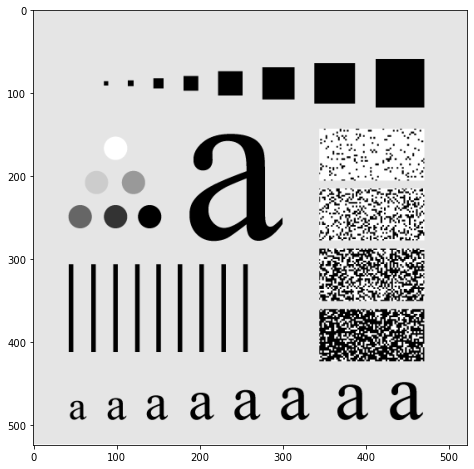

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2, fftfreq, fftshift

img = plt.imread('imgs/test_image.tiff')
plt.figure(figsize=[8,8])
plt.imshow(img, 'gray')

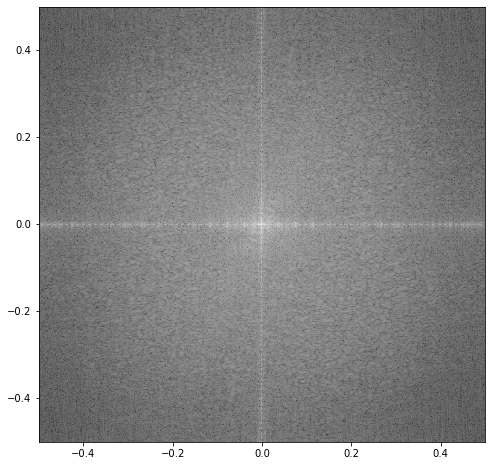

In [7]:
def generate_frequencies(num_rows, num_cols):
    
    freq_r = fftfreq(num_rows)
    freq_c = fftfreq(num_cols)
    freq_r = fftshift(freq_r)
    freq_c = fftshift(freq_c)
    
    return freq_r, freq_c

num_rows, num_cols = img.shape
img_padded = np.pad(img, ((0, num_rows), (0, num_cols)), mode='constant')
Fing = fft2(img_padded)
freq_r, freq_c = generate_frequencies(2*num_rows, 2*num_cols)
Fing = fftshift(Fing)

plt.figure(figsize=[8,8])
plt.pcolormesh(freq_c, freq_r, np.log(np.abs(Fing)), cmap='gray', shading='auto')


## Filtragem passa-baixa

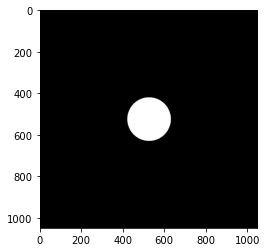

In [9]:
def filtro_passa_baixa(img, radius):
    
    num_rows, num_cols = img.shape
    freq_r, freq_c = generate_frequencies(num_rows, num_cols)
    
    low_pass_filter = np.zeros((num_rows, num_cols))
    for row in range(num_rows):
        for col in range(num_cols):
            distance = np.sqrt(freq_r[row]**2 + freq_c[col]**2)
            if distance<=radius:
                low_pass_filter[row, col] = 1
                
    return low_pass_filter

lp_filter = filtro_passa_baixa(img_padded, radius=0.1)
plt.imshow(lp_filter, 'gray')

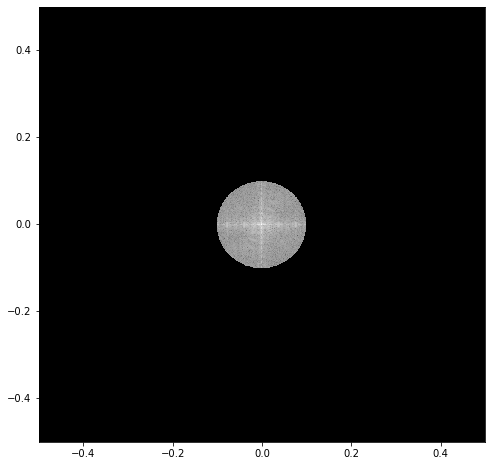

In [15]:
Fing_filtered = lp_filter*Fing
plt.figure(figsize=[8,8])
plt.pcolormesh(freq_c, freq_r, np.log(np.abs(Fing_filtered)+1), cmap='gray', shading='auto')

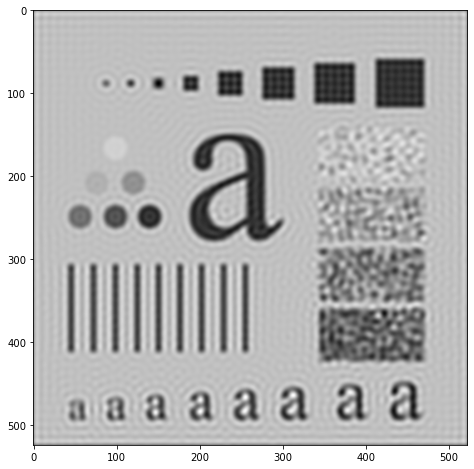

In [21]:
Fing_filtered = fftshift(Fing_filtered)
img_filtered = ifft2(Fing_filtered)
img_filtered = np.real(img_filtered)
img_filtered = img_filtered[0:num_rows, 0:num_cols]

plt.figure(figsize=[8,8])
plt.imshow(img_filtered, 'gray')

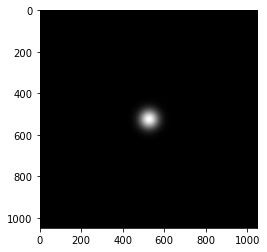

In [24]:
def filtro_passa_baixa_gaussiano(img, sigma_r, sigma_c):
    
    num_rows, num_cols = img.shape
    freq_r, freq_c = generate_frequencies(num_rows, num_cols)
    
    low_pass_gaussian_filter = np.zeros((num_rows, num_cols))
    for row in range(num_rows):
        for col in range(num_cols):
            exponent = freq_r[row]**2/(2*sigma_r**2) + freq_c[col]**2/(2*sigma_c**2)
            low_pass_gaussian_filter[row, col] = np.exp(-exponent)
                
    return low_pass_gaussian_filter

lp_filter = filtro_passa_baixa_gaussiano(img_padded, sigma_r=0.03, sigma_c=0.03)
plt.imshow(lp_filter, 'gray')

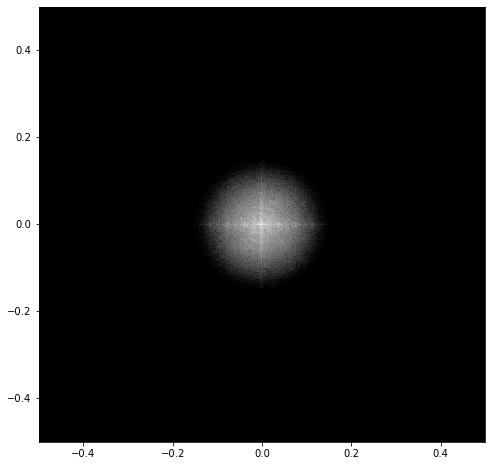

In [25]:
Fing_filtered = lp_filter*Fing
plt.figure(figsize=[8,8])
plt.pcolormesh(freq_c, freq_r, np.log(np.abs(Fing_filtered)+1), cmap='gray', shading='auto')

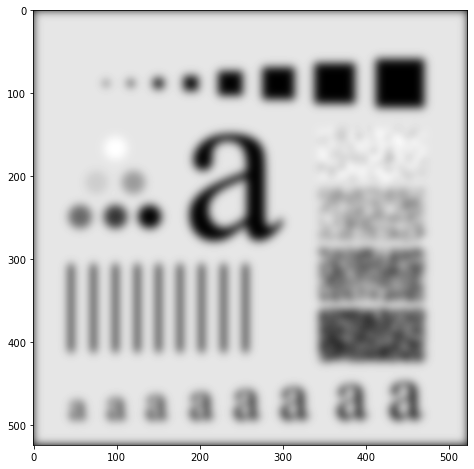

In [26]:
Fing_filtered = fftshift(Fing_filtered)
img_filtered = ifft2(Fing_filtered)
img_filtered = np.real(img_filtered)
img_filtered = img_filtered[0:num_rows, 0:num_cols]

plt.figure(figsize=[8,8])
plt.imshow(img_filtered, 'gray')

## Filtros passa-alta

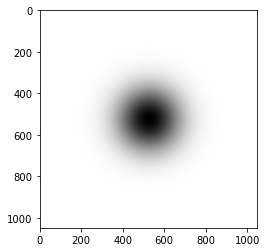

In [28]:
def filtro_passa_alta_gaussiano(img, sigma_r, sigma_c):
    
    num_rows, num_cols = img.shape
    freq_r, freq_c = generate_frequencies(num_rows, num_cols)
    
    high_pass_gaussian_filter = np.zeros((num_rows, num_cols))
    for row in range(num_rows):
        for col in range(num_cols):
            exponent = freq_r[row]**2/(2*sigma_r**2) + freq_c[col]**2/(2*sigma_c**2)
            high_pass_gaussian_filter[row, col] = np.exp(-exponent)
                
    return 1-high_pass_gaussian_filter

hp_filter = filtro_passa_alta_gaussiano(img_padded, sigma_r=0.1, sigma_c=0.1)
plt.imshow(hp_filter, 'gray')

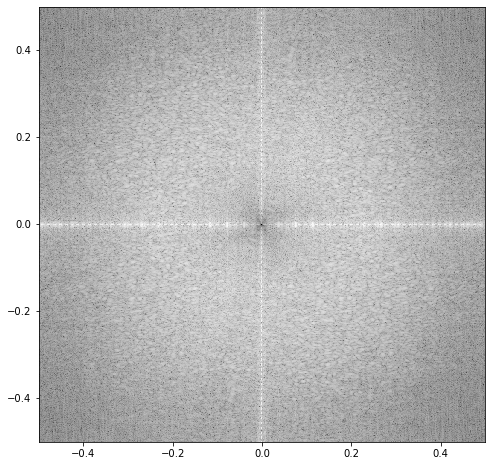

In [29]:
Fing_filtered = hp_filter*Fing
plt.figure(figsize=[8,8])
plt.pcolormesh(freq_c, freq_r, np.log(np.abs(Fing_filtered)+1), cmap='gray', shading='auto')

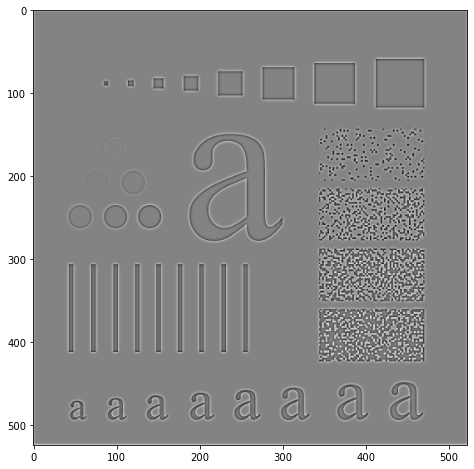

In [30]:
Fing_filtered = fftshift(Fing_filtered)
img_filtered = ifft2(Fing_filtered)
img_filtered = np.real(img_filtered)
img_filtered = img_filtered[0:num_rows, 0:num_cols]

plt.figure(figsize=[8,8])
plt.imshow(img_filtered, 'gray')

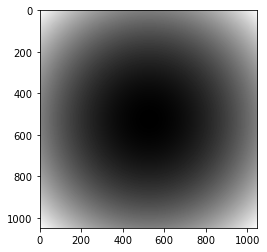

In [32]:
def filtro_passa_alta_laplaciano(img):
    
    num_rows, num_cols = img.shape
    freq_r, freq_c = generate_frequencies(num_rows, num_cols)
    
    lap_filter = np.zeros((num_rows, num_cols))
    for row in range(num_rows):
        for col in range(num_cols):
            lap_filter[row, col] = 4*np.pi*(freq_r[row]**2 + freq_c[col]**2)
                
    return lap_filter

lap_filter = filtro_passa_alta_laplaciano(img_padded)
plt.imshow(lap_filter, 'gray')

## Filtragem na frequÃªncia usando filtro espacial

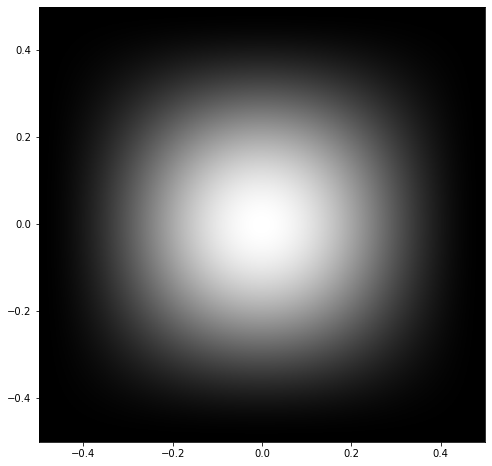

In [35]:
gauss_filt = np.array([[1, 2, 1],
                      [2, 4, 2],
                      [1, 2, 1]])
gauss_filt = gauss_filt/16

gauss_filt_image = np.zeros([2*num_rows, 2*num_cols])
gauss_filt_image[num_rows-1:num_rows+2, num_cols-1:num_cols+2] = gauss_filt

gauss_filt_image = fftshift(gauss_filt_image)
Ffilt = fft2(gauss_filt_image)
freq_r, freq_c = generate_frequencies(2*num_rows, 2*num_cols)
Ffilt = fftshift(Ffilt)

plt.figure(figsize=[8,8])
plt.pcolormesh(freq_c, freq_r, np.abs(Ffilt), cmap='gray', shading='auto')

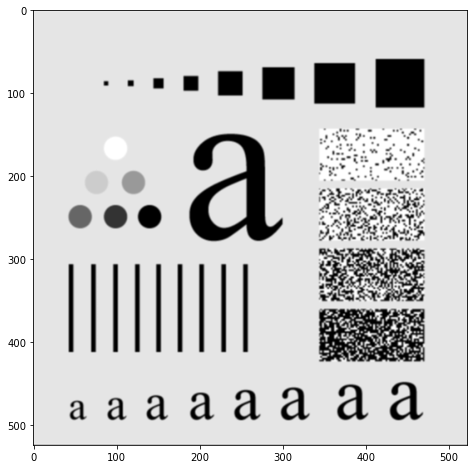

In [44]:
Fing = fft2(img_padded)
Fing = fftshift(Fing)

Fing_filtered = Ffilt*Fing
Fing_filtered = fftshift(Fing_filtered)
img_filtered = np.real(ifft2(Fing_filtered))
img_filtered = img_filtered[0:num_rows, 0:num_cols]

plt.figure(figsize=[8,8])
plt.imshow(img_filtered, 'gray')